# Final Project Report

* Class: DS 5100
* Student Name: Kaya Oguz
* Student Net ID: klo9xq
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:https://github.com/funkaya1234/FinalProject

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import random
import pandas as pd
import numpy as np

class Die:
    """
    This is a class for creating the die. There are methods to be able to 
    input the faces of the die and assign weights to them. The weight of any face can be adjusted, 
    the die can be rolled a specified number of times, and the faces and weights of the die
    can be shown.
    
    The attributes include:
    - faces, a numpy array (faces of the die)
    - weights, a numpy array (weights for each face)
    - _die, a Pandas Data Frame, Dataframe of the faces and weights.
    """
    def __init__(self, faces):
        """
        Initializer for the die.

        This takes a NumPy array of faces as an argument. Throws a `TypeError` if
        not a NumPy array.

        The array’s data type `dtype` may be strings or numbers.

        The array’s values must be distinct. Tests to see if the values are
        distinct and raises a `ValueError` if not.

        Internally initializes the weights to 1.0 for each face.

        Saves both faces and weights in a private data frame with faces in
        the index.
        
        Input arguments:
        - faces, a numpy array (faces of the die)

        """
        if type(faces) == np.ndarray:
            if len(faces) != len(np.unique(faces)):
                raise ValueError("Faces must contain only unique values.")
            else:
                self.faces = faces
                self.weights = np.ones(len(faces))
                self._die = pd.DataFrame({'weight': self.weights}, index=self.faces)
        else:
            raise TypeError("Faces must be a NumPy array")
            
            
    def adjust_weight(self, face_value, adjusted_weight):
        """
        Changes the weight of a single face of the die.

        This takes two arguments: the face value whose weight is to be changed 
        and the new weight.

        Checks to see if the face passed is a valid value, i.e., if it is in 
        the die array. If not, raises an `IndexError`.

        Checks to see if the new weight is a valid type, i.e., if it is numeric 
        (integer or float) or castable as numeric. If not, raises a `TypeError`.

        Updates the weight of the specified face in the private data frame.

        Input arguments:
        - face_value, the face of the die whose weight is to be changed.
        - adjusted_weight, the new weight to assign to the face (int or float), castable as numeric.

        """
        if face_value in self._die.index:
            if type(adjusted_weight) != int and type(adjusted_weight) != float:
                try:
                    adjusted_weight = float(adjusted_weight)
                except ValueError:
                    raise TypeError("Weight must be castable as numeric (int or float)")
            self._die.loc[face_value, 'weight'] = adjusted_weight
        else:
            raise IndexError("Face value not in die")

            
    def roll_die(self, n_rolls=1):
        """
        Rolls the die one or more times.

        Takes a parameter specifying the number of times the die is to be rolled.
        Defaults to 1 roll if no parameter is provided.

        Performs a random sample with replacement from the private die data frame, 
        applying the weights of each face during sampling.

        Returns a Python list of outcomes from the rolls.

        Does not store these results internally.

        Input arguments:
        - rolls, an integer specifying the number of rolls to perform (default is 1).

        Returns:
        - A list of outcomes from the rolls. (list)
        """
        results = []
        for i in range(n_rolls):
            result = self._die.sample(weights=self._die['weight']).index[0]
            results.append(result)
        return results
    
    def show_die(self):
        """
        Shows the current state of the die.

        Returns a copy of the private die data frame, which includes 
        the faces and their corresponding weights.

        Returns:
        - A pandas DataFrame containing the current state of the die with 
          faces as the index and weights as a column.
        """
        return self._die.copy()

class Game:
    """
    This is a class for playing a game for the dice. There are methods to be able to 
    roll multiple dice together and display results in wide or narrow data frame form.
    
    Attributes:
    - dice (list of instantiated dice from die class): A collection of Die objects used in the game.
    - results (pd.DataFrame): A DataFrame storing the results of each roll.
    """
    def __init__(self, similar_dice):
        """
        Initializes a new set of dice.

        Takes a parameter specifying a list of already instantiated similar dice. 

        Input arguments:
        - dice_list, a list containing previously instantiated Die objects.

        """
        
        reference_faces = similar_dice[0].faces
        for die in similar_dice:
            if not np.array_equal(die.faces, reference_faces):
                raise ValueError("All dice must have the same faces.")

        self.dice = similar_dice

    
    
    def play(self, n_rolls):
        """
        Rolls the dice a specified number of times.

        Takes an integer parameter specifying how many times the dice should 
        be rolled. Each roll will result in a random face being selected for 
        each die in the set. The results of all rolls are saved to a private 
        data frame in wide format.

        The data frame will have the roll number as the index, columns for 
        each die (using its list index as the column name), and the face rolled 
        for that die in each roll as the corresponding cell value.

        Input arguments:
        - rolls, an integer specifying the number of rolls to perform.
        """
        results = []
        for die in self.dice:
            result = die.roll_die(n_rolls)
            results.append(result)

        self.results = pd.DataFrame(results).T
        self.results.index += 1
        self.results.index.name = "Roll"
        
        columns = []
        for i in range(len(self.results.columns)):
            columns.append("Die " + str(i + 1))
        self.results.columns = columns
            
    
    def disp_results(self, form="wide"):
        """
        Returns the results of the most recent play.

        This method returns a copy of the private play data frame to the user. 
        The data frame can be returned in either wide or narrow format, with 
        the default being wide format.

        In wide format, the data frame has the roll number as the index, 
        columns for each die (using its list index as the column name), and 
        the face rolled for that die in each roll as the corresponding cell value.

        In narrow format, the data frame will have a `MultiIndex`, comprising 
        the roll number and the die number (in that order), with a single column 
        showing the outcomes (i.e., the face rolled) for each roll.

        Input arguments:
        - form (optional), a string specifying the format to return the data frame in. 
          Can be either 'wide' or 'narrow' (default is wide).

        Returns:
        - A copy of the play data frame in the specified format (Pandas DataFrame).
        """

        if form == "wide":
            return self.results.copy()
        elif form == "narrow":
            DataFrame_narrow = self.results.stack().reset_index()
            DataFrame_narrow.columns = ["roll", "die", "outcome"]
            narrow_results = DataFrame_narrow.set_index(["roll", "die"])
            return narrow_results
        else:
            raise ValueError("Must be wide or narrow form")

class Analyzer:
    """
    This is a class for doing analysis on a game. There are methods to be able to 
    find the number of, jackpots, faces per roll, combinations, and permutations.

    Attributes:
    - game (instantiated game object from game class): The game to be analyzed.
    """
    def __init__(self, game):
        """
        Initializes the object with a Game object.

        Takes a parameter specifying a Game object. If the passed value is 
        not a Game object, a ValueError will be raised.

        Input arguments:
        - game, an object representing a Game.

        """
        if type(game) is Game:
            self.game = game
        else:
            raise ValueError("Not a Game object")

    
    def n_jackpots(self):
        """
        Computes the number of jackpots in the game.

        A jackpot is defined as a result where all faces rolled are the same, 
        for example, all ones for a six-sided die.

        This method counts how many times the game resulted in a jackpot and 
        returns the total number of jackpots.

        Returns:
        - An integer representing the number of jackpots.
        """
        n_jackpots = 0
        for roll in self.game.results.values:
            if len(set(roll)) == 1:
                n_jackpots += 1

        return n_jackpots

    
    def n_faces_per_roll(self):
        """
        Computes the count of each face value rolled in each event.

        This method calculates how many times a given face is rolled in each 
        event. For example, if a roll of five dice results in all sixes, the 
        counts for this roll would be 5 for the face value '6' and 0 for the 
        other face values.

        Returns a data frame
        - index corresponds to the roll number.
        - columns represent each possible face value.
        - values in the cells show the count of each face value rolled for each roll.

        The data frame is in wide format.

        Returns:
        - A data frame containing the counts of each face value per roll (Pandas DataFrame).
        """
        face_counts = []
        for roll in self.game.results.values:
            counts = {}
            for face in roll:
                counts[face] = counts.get(face, 0) + 1
            face_counts.append(counts)

        face_counts_df = pd.DataFrame(face_counts).fillna(0).astype(int)  # Ensure integers
        face_counts_df = face_counts_df.reindex(columns=sorted([1, 2, 3, 4, 5, 6]), fill_value=0)  # Sort columns
        face_counts_df.index = range(1, len(face_counts_df) + 1)  # Start index at 1
        face_counts_df.index.name = 'Roll Number'

        return face_counts_df



    
    def n_combinations(self):
        """
        Computes the distinct combinations of faces rolled, along with their counts.

        This method identifies all distinct combinations of faces rolled during 
        the game. The combinations are order-independent and may contain repetitions. 
        It then counts how many times each combination occurred.

        Returns a data frame
        - multiIndex where each level represents a distinct combination of faces rolled.
        - Single column showing the count of how often each combination occurred.

        Returns:
        - A data frame containing the distinct combinations and their associated counts (DataFrame).
        """

        combinations = []

        for roll in self.game.results.values:
            sorted_roll = sorted(roll)
            combinations.append(tuple(sorted_roll))

        n_combinations = {}
        for combination in combinations:
            if combination in n_combinations:
                n_combinations[combination] += 1
            else:
                n_combinations[combination] = 1

        n_combinations_df = pd.DataFrame(list(n_combinations.items()), columns=['Combination', 'Number'])
        n_combinations_df = n_combinations_df.set_index('Combination')

        return n_combinations_df



    def n_permutations(self):
        """
        Computes the distinct permutations of faces rolled, along with their counts.

        This method identifies all distinct permutations of faces rolled during 
        the game. The permutations are order-dependent and may contain repetitions. 
        It then counts how many times each permutation occurred.

        Returns a data frame
        - multiIndex where each level represents a distinct permutation of faces rolled.
        - Single column showing the count of how often each permutation occurred.

        Returns:
        - A data frame containing the distinct permutations and their associated counts (DataFrame).
        """
        permutations = []

        for roll in self.game.results.values:
            permutations.append(tuple(roll))

        n_permutations = {}
        for permutation in permutations:
            if permutation in n_permutations:
                n_permutations[permutation] += 1
            else:
                n_permutations[permutation] = 1

        n_permutations_df = pd.DataFrame(list(n_permutations.items()), columns=['Permutation', 'Count'])
        n_permutations_df = n_permutations_df.set_index('Permutation')

        return n_permutations_df

```
  
 

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
import numpy as np
import pandas as pd
from MonteCarlo import Die, Game, Analyzer

class TestDie(unittest.TestCase):
    
    def test_initialization(self):
        """
        Tests the initialization of a Die object.

        This test checks the creation of a Die object with valid and invalid input faces. 
        - For valid faces, it ensures the weights are initialized to 1 
          and the internal die representation is a DataFrame with the faces as the index.
        - For duplicate faces, a ValueError should be raised.
        - For face types that are not numpy arrays, a TypeError should be raised.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        self.assertTrue(np.array_equal(die.weights, np.ones(len(faces))))
        self.assertIsInstance(die._die, pd.DataFrame)
        self.assertTrue(np.array_equal(die._die.index, faces))
        
        faces = np.array([1, 2, 3, 3, 5, 6])
        with self.assertRaises(ValueError):
            Die(faces)
    
        faces = [1, 2, 3, 4, 5, 6]
        with self.assertRaises(TypeError):
            Die(faces)
    
    def test_adjust_weight(self):
        """
        Tests the adjustment of a die's face weights.

        This test checks that the `adjust_weight` method updates the weight for a specific face. 
        It also ensures that invalid indices or incorrect weight types raise appropriate exceptions.
        - For adjusted weights that are not int or float or not castable as numeric, a TypeError should be raised.
        - For adjusting a weight that is not in the faces, an IndexError should be raised.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        die.adjust_weight(1, 2)
        self.assertEqual(die._die.loc[1, 'weight'], 2)
        
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        
        with self.assertRaises(IndexError):
            die.adjust_weight(7, 2)
    
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        with self.assertRaises(TypeError):
            die.adjust_weight(1, "An Incorrect weight (not int or float, not castable as numeric)")
    
    def test_roll_die(self):
        """
        Tests the rolling of the die.

        This test verifies that the roll_die method returns a valid result. The results of multiple rolls 
        should always be one of the faces on the die. When calling the function, the default should be one roll.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)

        results = die.roll_die(10)
        self.assertTrue(all(result in faces for result in results))
        
        result = die.roll_die()  
        self.assertEqual(len(result), 1)
        self.assertEqual(type(result), list)

    
    def test_show_die(self):
        """
        Tests the display of the die's state.

        This test checks that the showdie method returns the current state of the die as a DataFrame. 
        The index of the DataFrame should correspond to the die faces, and the weight column should 
        contain the initial weight values.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        die_state = die.show_die()
        self.assertIsInstance(die_state, pd.DataFrame)
        self.assertTrue(np.array_equal(die_state.index, faces))
        self.assertTrue(np.array_equal(die_state['weight'], np.ones(len(faces))))


class TestGame(unittest.TestCase):
    
    def test_initialization(self):
        """
        Tests the initialization of the Game class.
        
        Verifies that the Game object correctly initializes with the provided dice
        and ensures that the faces of the dice match the expected values.
        Also tests the case where the dice have mismatched faces, which should raise a ValueError.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        self.assertEqual(len(game.dice), 2)
        self.assertTrue(np.array_equal(game.dice[0].faces, faces))
        self.assertTrue(np.array_equal(game.dice[1].faces, faces))
    
        faces1 = np.array([1, 2, 3, 4, 5, 6])
        faces2 = np.array([1, 2, 3, 4, 7, 8])
        die1 = Die(faces1)
        die2 = Die(faces2)
        with self.assertRaises(ValueError):
            Game([die1, die2])
    
    def test_play(self):
        """
        Tests the play method of the Game class.
        
        Verifies that after calling the play method, the results are stored in a pandas DataFrame.
        Ensures that the number of rolls corresponds to the specified number of rolls.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        game.play(5)
        self.assertIsInstance(game.results, pd.DataFrame)
        self.assertEqual(len(game.results), 5)
    
    def test_disp_results(self):
        """
        Tests the disp_results method of the Game class.
        
        Verifies that the results can be displayed in wide or narrow.
        Ensures that the output format matches has the right column names and index.
        Also tests that an invalid format raises a ValueError.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        game.play(5)
        results_wide = game.disp_results(form="wide")
        self.assertIsInstance(results_wide, pd.DataFrame)
        self.assertTrue(all(results_wide.index == [1, 2, 3, 4, 5]))
        self.assertListEqual(list(results_wide.columns), ['Die 1', 'Die 2'])
    
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        game.play(5)
        results_narrow = game.disp_results(form="narrow")
        self.assertIsInstance(results_narrow, pd.DataFrame)
        self.assertTrue(isinstance(results_narrow.index, pd.MultiIndex))
        self.assertEqual(results_narrow.index.names, ['roll', 'die'])
        self.assertEqual(list(results_narrow.columns), ['outcome'])
    
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        game.play(5)
        with self.assertRaises(ValueError):
            game.disp_results(form="not a valid form (not narrow or wide)")




class TestAnalyzer(unittest.TestCase):

    def test_initialize_analyzer(self):
        """
        Tests the initialization of the Analyzer class.
        
        Verifies that the Analyzer object is correctly initialized with a Game object.
        Ensures that a ValueError is raised if a non-Game object is passed to the Analyzer.
        """
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1, die2])
        game.play(5)
        
        analyzer = Analyzer(game)
        self.assertIsInstance(analyzer, Analyzer)
        
        with self.assertRaises(ValueError):
            Analyzer("passed value (not a game object)")
            
    def test_n_jackpots(self):
        """
        Tests the n_jackpots method of the Analyzer class.
        
        Verifies that the n_jackpots method returns an integer value representing the number of jackpots
        that occurred during the game and tests the method on sample data.
        """
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1, die2])
        game.play(5)
        
        analyzer = Analyzer(game)
        jackpots = analyzer.n_jackpots()
        self.assertIsInstance(jackpots, int)
        
        
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1, die2])

        game.results = pd.DataFrame({
            'Die1': [1, 2, 3, 1, 5],
            'Die2': [1, 2, 4, 1, 6]
        })

        expected_jackpots = 3
        analyzer = Analyzer(game)
        jackpots = analyzer.n_jackpots()

        self.assertEqual(jackpots, expected_jackpots)

        
        
    def test_n_faces_per_roll(self):
        """
        Tests the n_faces_per_roll method of the Analyzer class.
        
        Verifies that the n_faces_per_roll method returns a DataFrame with the count of faces rolled for each
        roll. Ensures the values are numeric and that the index is labeled Roll Number and tests the method on sample data.
        """
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1, die2])
        game.play(5)
        
        analyzer = Analyzer(game)
        face_counts_df = analyzer.n_faces_per_roll()
        self.assertIsInstance(face_counts_df, pd.DataFrame)
        self.assertEqual(face_counts_df.index.name, "Roll Number")
        
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1, die2])
        
        known_results = pd.DataFrame({
            'Die1': [1, 2, 3, 4, 5],
            'Die2': [6, 5, 4, 3, 2]
        })
        game.results = known_results
        
        analyzer = Analyzer(game)
        face_counts_df = analyzer.n_faces_per_roll()
        
        expected_data = {
            1: [1, 0, 0, 0, 0, 1],  
            2: [0, 1, 0, 0, 1, 0],  
            3: [0, 0, 1, 1, 0, 0],  
            4: [0, 0, 1, 1, 0, 0],  
            5: [0, 1, 0, 0, 1, 0]   
        }
        
        expected_df = pd.DataFrame(expected_data).T
        expected_df.index.name = 'Roll Number'
        expected_df.columns = [1, 2, 3, 4, 5, 6]

        # Use pd.testing.assert_frame_equal to assert DataFrame equality
        pd.testing.assert_frame_equal(face_counts_df, expected_df)
        
        
    def test_n_combinations(self):
        """
        Tests the n_combinations method of the Analyzer class.
        
        Verifies that the n_combinations method returns a DataFrame showing the number of possible combinations
        for each roll and that the Number column is included in the result and tests the method on sample data.
        """
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1, die2])
        game.play(5)
        
        analyzer = Analyzer(game)
        combinations_df = analyzer.n_combinations()
        self.assertIsInstance(combinations_df, pd.DataFrame)
        self.assertTrue("Number" in combinations_df.columns)
        
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1, die2])
        
        known_results = pd.DataFrame({
            'Die1': [1, 2, 3, 4, 5],
            'Die2': [6, 6, 6, 6, 6]
        })
        game.results = known_results
        
        analyzer = Analyzer(game)
        combinations_df = analyzer.n_combinations()
        
        expected_data = {
            (1, 6): 1,
            (2, 6): 1,
            (3, 6): 1,
            (4, 6): 1,
            (5, 6): 1,
        }
        expected_df = pd.DataFrame.from_dict(expected_data, orient='index', columns=['Number'])
        expected_df.index.name = 'Combination'

        pd.testing.assert_frame_equal(combinations_df, expected_df)
    def test_n_permutations(self):
        """
        Tests the n_permutations method of the Analyzer class.
        
        Verifies that the n_permutations method returns a DataFrame with the number of permutations for each roll and tests the method on sample data.
        """
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1, die2])
        known_results = pd.DataFrame({
            'Die1': [1, 2, 1, 2, 1],
            'Die2': [6, 6, 6, 6, 6]
        })
        game.results = known_results
        expected_data = {
            (1, 6): 3,
            (2, 6): 2,
        }
        expected_df = pd.DataFrame.from_dict(expected_data, orient='index', columns=['Count'])
        expected_df.index.name = 'Permutation'
        analyzer = Analyzer(game)
        permutations_df = analyzer.n_permutations()
        pd.testing.assert_frame_equal(permutations_df, expected_df)
if __name__ == '__main__':
    unittest.main(verbosity=3)

```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
(base) bash-4.4$python test_MonteCarlo.py
test_initialize_analyzer (__main__.TestAnalyzer.test_initialize_analyzer)
Tests the initialization of the Analyzer class. ... ok
test_n_combinations (__main__.TestAnalyzer.test_n_combinations)
Tests the n_combinations method of the Analyzer class. ... ok
test_n_faces_per_roll (__main__.TestAnalyzer.test_n_faces_per_roll)
Tests the n_faces_per_roll method of the Analyzer class. ... ok
test_n_jackpots (__main__.TestAnalyzer.test_n_jackpots)
Tests the n_jackpots method of the Analyzer class. ... ok
test_n_permutations (__main__.TestAnalyzer.test_n_permutations)
Tests the n_permutations method of the Analyzer class. ... ok
test_adjust_weight (__main__.TestDie.test_adjust_weight)
Tests the adjustment of a die's face weights. ... ok
test_initialization (__main__.TestDie.test_initialization)
Tests the initialization of a Die object. ... ok
test_roll_die (__main__.TestDie.test_roll_die)
Tests the rolling of the die. ... ok
test_show_die (__main__.TestDie.test_show_die)
Tests the display of the die's state. ... ok
test_disp_results (__main__.TestGame.test_disp_results)
Tests the disp_results method of the Game class. ... ok
test_initialization (__main__.TestGame.test_initialization)
Tests the initialization of the Game class. ... ok
test_play (__main__.TestGame.test_play)
Tests the play method of the Game class. ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.043s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import MonteCarlo.MonteCarlo as Module

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(Module)

Help on module MonteCarlo.MonteCarlo in MonteCarlo:

NAME
    MonteCarlo.MonteCarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  This is a class for doing analysis on a game. There are methods to be able to 
     |  find the number of, jackpots, faces per roll, combinations, and permutations.
     |  
     |  Attributes:
     |  - game (instantiated game object from game class): The game to be analyzed.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initializes the object with a Game object.
     |      
     |      Takes a parameter specifying a Game object. If the passed value is 
     |      not a Game object, a ValueError will be raised.
     |      
     |      Input arguments:
     |      - game, an object representing a Game.
     |  
     |  n_combinations(self)
     |      Computes the distinct combinations of faces rolled, along 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/funkaya1234/FinalProject/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```
(base) bash-4.4$pip install .
Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/gpfs/tardis/home/klo9xq/Documents/MSDS/DS5100/DS5100--funkaya1234-/lessons/Final Project/FinalProject
  Preparing metadata (setup.py) ... done
Building wheels for collected packages: MonteCarlo
  Building wheel for MonteCarlo (setup.py) ... done
  Created wheel for MonteCarlo: filename=MonteCarlo-0.1-py3-none-any.whl size=9379 sha256=59b623febcb67fcf4d08c70998d2c898811eb3ed5377b7b61600bc9043919038
  Stored in directory: /tmp/pip-ephem-wheel-cache-vkih3syw/wheels/77/67/ef/4f302f16ed76d81201829cdd978977f98f75eae8a723b1589b
Successfully built MonteCarlo
Installing collected packages: MonteCarlo
  Attempting uninstall: MonteCarlo
    Found existing installation: MonteCarlo 0.1
    Uninstalling MonteCarlo-0.1:
      Successfully uninstalled MonteCarlo-0.1
Successfully installed MonteCarlo-0.1
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
import numpy as np
from MonteCarlo import Die, Game, Analyzer

fair_coin = Die(np.array(["H", "T"]))
unfair_coin = Die(np.array(["H", "T"]))

unfair_coin.adjust_weight("H", 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [4]:
array = np.array([1, 2, 3, 4, 5, 6])

fair_die_1 = Die(array)
fair_die_2 = Die(array)

dice = [fair_die_1, fair_die_2]
game = Game(dice)

game.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [5]:
array = np.array([1, 2, 3, 4, 5, 6])

unfair_die_1 = Die(array)
unfair_die_2 = Die(array)
fair_die = Die(array)

unfair_die_1.adjust_weight(6, 5)
unfair_die_2.adjust_weight(6, 5)

dice = [fair_die, unfair_die_1, unfair_die_2]

new_game = Game(dice)
new_game.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [6]:
game_analysis = Analyzer(game)
new_game_analysis = Analyzer(new_game)

print(game_analysis.n_jackpots())
print(new_game_analysis.n_jackpots())

162
56


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [7]:
game_relative_freq = game_analysis.n_jackpots() / 1000
new_game_relative_freq = new_game_analysis.n_jackpots() / 1000

print(game_relative_freq)
print(new_game_relative_freq)

0.162
0.056


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

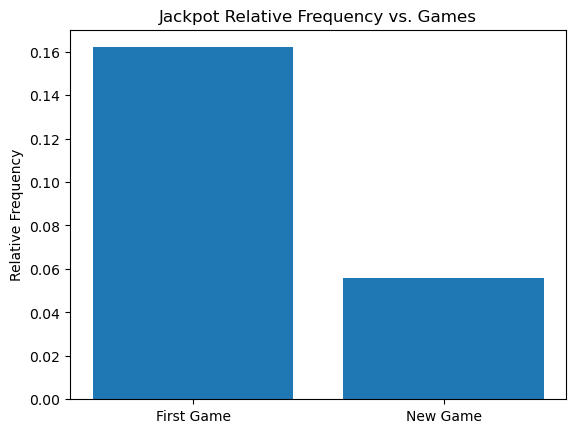

In [8]:
import matplotlib.pyplot as plt

plt.bar(['First Game', 'New Game'], 
        [game_relative_freq, new_game_relative_freq])
plt.ylabel('Relative Frequency')
plt.title('Jackpot Relative Frequency vs. Games')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [9]:
array = np.array([1, 2, 3, 4, 5, 6])

die_1 = Die(array)
die_2 = Die(array)
die_3 = Die(array)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [10]:
die_2.adjust_weight(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [11]:
die_3.adjust_weight(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [20]:
array = np.array([1, 2, 3, 4, 5, 6])
fair_dice = []
for i in range (5):
    fair_dice.append(Die(array))

game1 = Game(fair_dice)
game1.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [21]:
array = np.array([1, 2, 3, 4, 5, 6])

unfair_die_1 = Die(array)
unfair_die_2 = Die(array)
fair_die_1 = Die(array)
fair_die_2 = Die(array)
fair_die_3 = Die(array)

unfair_die_1.adjust_weight(6, 5)
unfair_die_2.adjust_weight(1, 5)

dice = [unfair_die_1, unfair_die_2, fair_die_1, fair_die_2, fair_die_3]

game2 = Game(dice)
game2.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

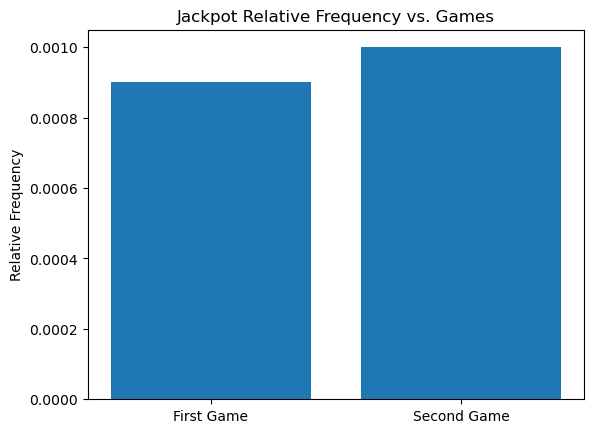

In [22]:
import matplotlib.pyplot as plt

game1_analysis = Analyzer(game1)
game2_analysis = Analyzer(game2)

relative_frequency_game1 = game1_analysis.n_jackpots() / 10000  
relative_frequency_game2 = game2_analysis.n_jackpots() / 10000  

plt.bar(['First Game', 'Second Game'], 
        [relative_frequency_game1, relative_frequency_game2])
plt.ylabel('Relative Frequency')
plt.title('Jackpot Relative Frequency vs. Games')
plt.show()


## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [15]:
file = open('english_letters.txt')
frequencies = {}

for line in file:
    parts = line.strip().split()
    letter = parts[0]
    count = int(parts[1])
    frequencies[letter] = count

file.close()


letters = np.array(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))

letters_die = Die(letters)

for letter in letters:
    weight = frequencies[letter]
    letters_die.adjust_weight(letter, weight)

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [16]:
letters_die_1 = Die(np.array(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')))
letters_die_2 = Die(np.array(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')))
letters_die_3 = Die(np.array(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')))
letters_die_4 = Die(np.array(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')))

dice = [letters_die_1, letters_die_2, letters_die_3, letters_die_4]
for die in dice:
    for letter in letters:
        weight = frequencies[letter]
        die.adjust_weight(letter, weight)

game = Game(dice)
game.play(1000)

print("Game played with 1000 rolls using 4 letter-based dice.")


Game played with 1000 rolls using 4 letter-based dice.


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [17]:
import itertools
import random
import pandas as pd
import numpy as np

file = open('scrabble_words.txt', 'r')
scrabble_vocab = set()

for line in file:
    scrabble_vocab.add(line.strip().upper())

file.close()

results = game.results

tuples_list = []  
for i in results.values:
    tuples_list.append(tuple(i))

permutation_counts = pd.Series(tuples_list).value_counts()
perm_total = len(permutation_counts)

valid_words_count = 0
for permutation in tuples_list:
    word = ''.join(permutation)
    if word in scrabble_vocab:
        valid_words_count += 1

invalid_words_count = perm_total - valid_words_count

print("Valid Words", valid_words_count)
print("Invalid Words:", invalid_words_count)


Valid Words 49
Invalid Words: 940


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [18]:
import itertools
import random
import pandas as pd
import numpy as np

letters = np.array(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))


letters_die_1 = Die(letters)
letters_die_2 = Die(letters)
letters_die_3 = Die(letters)
letters_die_4 = Die(letters)
letters_die_5 = Die(letters)



letters_die = Die(letters)

dice = [letters_die_1, letters_die_2, letters_die_3, letters_die_4, letters_die_5]
for die in dice:
    for letter in letters:
        weight = frequencies[letter]
        die.adjust_weight(letter, weight)

game = Game(dice)
game.play(1000)

file = open('scrabble_words.txt', 'r')
scrabble_vocab = set()

for line in file:
    scrabble_vocab.add(line.strip().upper())

file.close()

results = game.results

tuples_list = []  
for i in results.values:
    tuples_list.append(tuple(i))

permutation_counts = pd.Series(tuples_list).value_counts()
perm_total = len(permutation_counts)

valid_words_count = 0
for permutation in tuples_list:
    word = ''.join(permutation)
    if word in scrabble_vocab:
        valid_words_count += 1

invalid_words_count = perm_total - valid_words_count

print("Valid Words", valid_words_count)
print("Invalid Words:", invalid_words_count)


Valid Words 14
Invalid Words: 986
